# Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

#### Members in group 4
Nima Hansen - 20h
Kailash de Jesus Hornig - 20h


In [ ]:
pip install tensorflow

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: 'RECORD'

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

2022-10-15 13:18:31.125535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 13:18:31.240080: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-15 13:18:31.244787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-15 13:18:31.244809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

#In the notebook, the data is downloaded from an external server imported into the notebook environment using the mnist.load_data() function call
(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
print(type(x_train)) 

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


**Preprocessing**

In [ ]:
# casting the type from uint8 to float 32-bit (Cast a pandas object to a specified dtype dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Formatting the values into our 0-1 intervall
#(https://keras.io/getting_started/intro_to_keras_for_engineers/:an image model should expect RGB pixel values in the [0, 255] range)
x_train /= 255
x_test /= 255

#Converts a class vector (integers) to binary class matrix (creates the hot one encoder vector)
y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


#### Question 1 answer;
First part: After loading the data from the external server into the variables of x_train/test these values are casted from the uint8 (integer) fromat they arrive in into the the right format 32 bit float. Which is a format commonly used when training neural networks. Also this is handy in the second part as we scale the previous intergers to a decimal value. 

Second part: Here the values are converted from the RGB pixel values [0, 255] to a value in the interval between 0.0-1.0 

Third part: The method to_categorical() in Keras library converts the class vector to binary class matrix. By doing so we create a format representing the labels in our model as one hot endocing vectors that represent each number 0-9 with a binary value of 0 for negative and 1 for positive in each position in a 10 position long array. E.g. the value 2 is represented as a value 1 in the third position [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.].

#### Defining model

In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4630 - accuracy: 0.8680 - val_loss: 0.2508 - val_accuracy: 0.9261
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2256 - accuracy: 0.9342 - val_loss: 0.2073 - val_accuracy: 0.9367
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1749 - accuracy: 0.9491 - val_loss: 0.1566 - val_accuracy: 0.9525
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9574 - val_loss: 0.1414 - val_accuracy: 0.9583
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9638 - val_loss: 0.1190 - val_accuracy: 0.9637
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9675 - val_loss: 0.1218 - val_accuracy: 0.9633
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9714 - val_loss: 0.1112 - val_accuracy: 0.9653
Epoch 

In [ ]:
# Question 2a - for print out
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary
model.summary()
print(model.layers)
print("\n Number of layers:",len(model.layers))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
[<keras.layers.reshaping.flatten.Flatten object at 0x7f63919df670>, <keras.layers.core.dense.Dense object at 0x7f63f9926250>, <keras.layers.core.dense.Dense object at 0x7f63f98df520>, 

#### Question 2a Answer

A) How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why does the input and output layers have the dimensions they have? 

- Number of layers: The number of layers can be seen above, we have 4 layers.
    - The input layer (flatten layer).
    - Two hidden layers.
    - A output layer.

- Number of neurons for each layer:
    - input layer/flatten layer: The input layer has 28x28 = 784 neuron, it just reshapes.
    - hidden layers: both the layers has 64 neurons which we can read from the "output shape" above.
    - output layer: The output layers has 10 neurons, one per class label (0-9).

- The activation functions and why these are appropriate for this application:
    - for the hidden layers we can see that the activation function used is called ReLU (Rectified Linear function). Which is in the documentation described as a function f(x) = max(x,0). For each neurons we will check if this passed in x-value is bigger than 0, if not, the neuron will not be activated. ReLU has become commonly used in recent years and might be more computationally efficient as it does not activiate all neurons. It is refered to as a better choice to go with than Sigmoid or Tanh by the souce(http://neuralnetworksanddeeplearning.com/chap6.html) given in the module. 

    - For the output layer we can see that the activation function used is called Softmax, which also is a commonly used activation function in the output layer when dealing with multiclassification problems, i.e when there is just not one possible class which is exactly the problem we are dealing with thereby appropriate. This functions normalize the output to a probability distribution over the predicted class labels. Where it make sure that all neurons (each represent a class label) have a probability and that all neurons probability together sum to 1. 

- Total number of parameters:
    - By looking at the print of by calling the "summary" method on our model, we can see that we in total have 50 050 parameters. Using the youtube video linked, we can conclude that these consists of the weight parameters ((784 * 64)+(64 * 64)+(64 * 10))= 50176 + 4096 + 640 = 54 912, and the number of biases = 64+64+10 = 138 so in totall (54912+138)= 50 050.

- Why the input and output layers have the dimensions they have:
    - This was covered in the lecture and youtube video Bastian linked. The input layers has it dimension 784 as it reshapes the input of 28*28 pixels (for the images/training sample). Meaning each neuron will represent one pixel.
    - The output layer has it 10 dimension as the number of class labels are 0-9 = 10 so each neuron will represent a class label/digit, eg if the last neuron fires, it will indicate that our network believes that the the right digit is "9". 




#### Question 2b Answer
B) What loss-function is used to train the network? What is the functional form (mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

- The loss-function used to train the network is called categorial cross entropy which can be identified under "Defining model above".

- the functional form of the loss function is: $Loss = - \sum_{i=1}^{\textrm{output size}} y_i * log \hat{y}_{i} $ according to Peltarion (N.d.), which should be interpreted as the following:
    - $\hat{y}_{i}$ represents the scalar value in the model output (predicted values) on position i. 
    - $y_{i}$ represents the corresponding target value/correct value.
        - e.g if the training sample's true class is 0, $y$ = (1,0,0,0,0,0,0,0,0,0)
    -  output size  equals the the number of scalar values in the model output, which is 10 in our case.

    - Interpreting:
        - The cost function is used to quantify how well we are achieving our goal. The smaller the loss is, the better our algorithm are doing in finding weights and biases reaching our goal. 
        - We know that only one value ($y_{i}$) will equal "1" in $y$ the rest will be 0, so the loss is only dependent on how high our probability is for $\hat{y}_{i}$ for this specific $i$ that give ($y_{i}$) = 1, otherwise, we will multiplicate with 0 --> =0. The higher probability we have for this position $i$ in $\hat{y}$, the smaller the value log($\hat{y}_{i}$) will be, multiplied by one and then "-" as log(x) will be negative for x smaller than 1 (https://peltarion.com/knowledge-center/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy). Conclusion, the closer we are to reaching a probability of 1 for the i that corresponds to the correct class, the smaller loss we will have. Instead, are we far from the right probability, we will be puniched logarithmically. So to minimize this loss which is are goal, we need to have as correct predictions as possible and this loss is therefore used to readjust the weights and could be seen as guiding the training process.

- According to (https://peltarion.com/knowledge-center/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy) this loss function is only appropriate when we are using softmax activation function which we are. In addition, this loss-function is appropriate for multi-classification problems, which is exactly problem we are dealing with, where we only have one correct category/class for each training image. 





#### Question 2c

{'loss': [0.47322869300842285, 0.22833120822906494, 0.17121803760528564, 0.13966397941112518, 0.1184239611029625, 0.10282709449529648, 0.09209791570901871, 0.08158070594072342, 0.07362761348485947, 0.06718526035547256], 'accuracy': [0.8657833337783813, 0.9339333176612854, 0.9513499736785889, 0.9601500034332275, 0.9657333493232727, 0.9702500104904175, 0.9730499982833862, 0.9761666655540466, 0.9782666563987732, 0.980733335018158], 'val_loss': [0.25241148471832275, 0.18469244241714478, 0.1533392369747162, 0.13691337406635284, 0.11984895914793015, 0.10483627766370773, 0.10786368697881699, 0.09968261420726776, 0.09816012531518936, 0.08988568186759949], 'val_accuracy': [0.9277999997138977, 0.9480000138282776, 0.9538000226020813, 0.9606999754905701, 0.9648000001907349, 0.9702000021934509, 0.9677000045776367, 0.9692000150680542, 0.9704999923706055, 0.9728000164031982]}
number of epochs: 10


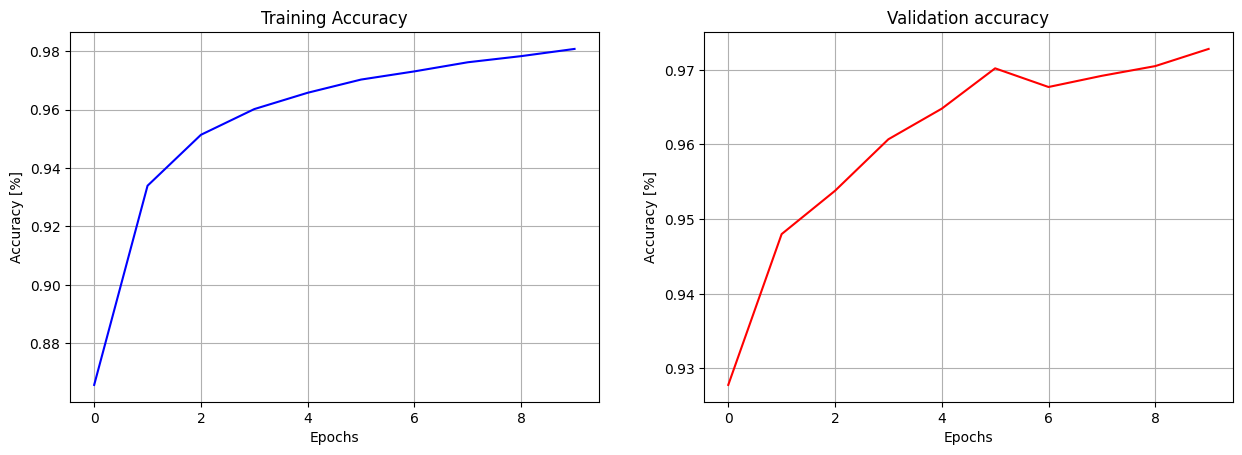

In [ ]:
#"A History object. Its History.history attribute is a record of training loss values"
# "and metrics values at successive epochs,"
#"as well as validation loss values and validation metrics values (if applicable)."

#print(model.metrics_names)
print(fit_info.history)
print("number of epochs:", len(fit_info.epoch))

# Creating a figure for the subplots
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)

#styling and creating first plot
ax1.set_title('Training Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy [%]')
ax1.plot(fit_info.history["accuracy"], c='b')
ax1.grid()

#styling and creating second plot
ax2.set_title('Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy [%]')
ax2.plot(fit_info.history["val_accuracy"], c='r')
ax2.grid()

plt.show()

#### Question 2c Answer:
C) Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

As we can see above, we started with 10 epochs so no change was needed. What we can read from the two plots above is that the validation accuracy is higher in the beginning than the training accuracy, but the training accurucy eventually catches up and rises over the validation accuracy. One thing that we can conclude is that our model is not overfitted. We get a high accuracy at the validation data, data not used in the training, meaning that we do well on new data and not only on our training data. We can also try to interpret this as when the number of ephochs increases, our "neurons" are being more and more trained to classify our training data, hence the accuracy increases. Whereas the validation still will be new data and unseen to our model, hence, it will just perform better as our model has become better, not because the model has fitted to this specific data.




#### Question 2d answer:
D) Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

##### Update the number of hidden units
We assume that you first want us to change the hidden-layers to 500 and 300 hidden units respectively and then in another step implement weight decay. So this first part will only include changing the hidden units.

In [ ]:
#changed number of epochs to 40
epochs = 40

#Using same code as previously
model = Sequential()

model.add(Flatten())
#changed the number of units/neurons to 500 for the first hidden layer
model.add(Dense(500, activation = 'relu'))  
#changed the number of units/neurons to 300 for the second hidden layer
model.add(Dense(300, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

#the rest is same as before, except setting verbose = 0, to skip the prints
model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Test loss: 0.0671081393957138, Test accuracy 0.9815000295639038


In [ ]:
print(fit_info.history["val_accuracy"])
print("The best validation accuracy:", max(fit_info.history["val_accuracy"]))

[0.9316999912261963, 0.947700023651123, 0.9595999717712402, 0.9668999910354614, 0.970300018787384, 0.9740999937057495, 0.9742000102996826, 0.9764999747276306, 0.9765999913215637, 0.9793000221252441, 0.9786999821662903, 0.9789999723434448, 0.9793000221252441, 0.9794999957084656, 0.98089998960495, 0.9807999730110168, 0.9797999858856201, 0.9804999828338623, 0.9797000288963318, 0.9811000227928162, 0.9805999994277954, 0.9805999994277954, 0.9810000061988831, 0.9807999730110168, 0.9814000129699707, 0.9803000092506409, 0.980400025844574, 0.9812999963760376, 0.980400025844574, 0.9801999926567078, 0.9807999730110168, 0.9807000160217285, 0.9807999730110168, 0.9807000160217285, 0.9807000160217285, 0.9814000129699707, 0.9811000227928162, 0.98089998960495, 0.980400025844574, 0.980400025844574]
The best validation accuracy: 0.9814000129699707


##### Implement weight decay, L2 regularization of weights.

In [ ]:
import numpy as np
epochs = 40
reg_factors = np.linspace(0.000001,0.001,5)
nrOfReplicates=3
scores = []

#for each regulization factor
for i in range(5):
    #we want to create three replicates
    for r in range(nrOfReplicates):
        #Using same code as previously
        model = Sequential()
        model.add(Flatten())
        #adding the regularization factors
        model.add(Dense(500, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(reg_factors[i])))
        model.add(Dense(300, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(reg_factors[i])))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0, #Removing the prints as we get a error otherwise, too long
           validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        scores.append(score[1]) #we only want the accuracy data

2022-10-14 21:11:02.142524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-14 21:11:02.142558: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-14 21:11:02.142575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e7d4b0ec-2845-4a3a-bacb-c69d67d96aab): /proc/driver/nvidia/version does not exist
2022-10-14 21:11:02.142848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0.9817000031471252, 0.9822999835014343, 0.9818000197410583, 0.9812999963760376, 0.9825999736785889, 0.9815000295639038, 0.9764999747276306, 0.98089998960495, 0.9821000099182129, 0.9700999855995178, 0.9818999767303467, 0.9811999797821045, 0.9814000129699707, 0.9807000160217285, 0.9807000160217285]


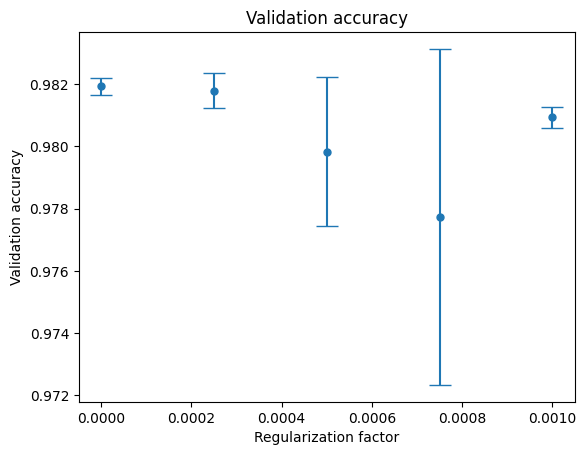

Maximal validation accuracy:  0.9825999736785889
Maximal mean validation accuracy:  0.9819333354632059
Difference in validation accuracy from Hilton (0.9847) using maximal accuracy:  0.0021000263214111525
Difference in validation accuracy from Hilton (0.9847) using maximal mean accuracy:  0.0027666645367940834


In [ ]:
# Diagrams for the plot of accuracy 
std = []
mean = []
print(scores)
for i in range(0, len(scores), 3):

    std_value= np.std(scores[i:i+3]) #std for the 3 replicas for each regularization factor
    std.append(std_value) #add this value to our array with std values

    mean_value = np.mean(scores[i:i+3]) #same as above but for the mean
    mean.append(mean_value) #same as above but for mean

plt.xlabel("Regularization factor")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy")

plt.errorbar(reg_factors, mean, std, markersize=5, fmt='o', capsize=8)
plt.show()

print("Maximal validation accuracy: ", np.max(scores))
print("Maximal mean validation accuracy: ", np.max(mean))
print("Difference in validation accuracy from Hilton (0.9847) using maximal accuracy: ", 0.9847-np.max(scores))
print("Difference in validation accuracy from Hilton (0.9847) using maximal mean accuracy: ", 0.9847-np.max(mean))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 500)               392500    
                                                                 
 dense_43 (Dense)            (None, 300)               150300    
                                                                 
 dense_44 (Dense)            (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


#### Answer Question 2d:
The highest final validation accurucy, the highest mean validation accuracy as well as the difference from hiltons value of 0.9847 is printed above. We get somewhere close, we deviate with 0,0021 (0,21%) and 0,0028 (0,28%) when using mean. 

The only thing that is mentioned in the source provided is "3-layer NN, 500+300 HU, softmax, cross entropy, weight decay".So there are several things that can be the reason to why we get different results.

- One important aspect that we don't know of is if he is refering to the mean for all replicates given a certain regularization factor or if he only took the highest possible accuracy he recieved for a certain replicate. Which of course will result in a big difference given the standard deviation. 

- Another factor that is not specified is how many replicates he used, we only used three and it would have taken a lot longer if we used more. However, this will of course have an impact on the mean as we may have converged to a higher mean value using more replicates. This will also impact the maximal validation accuracy, as if we did more replicates, we may have recieved an even higher maximal validation accuracy seen above.

- Another factor not being stated is the value of the regularization factor. As we can identify in the plot above, the choice of this factor give us very different results even when having the same values on the other factors and we have just tried 5 of several possible choices. 

- Lastly, the other hyperparameters such as the number of epochs, learning rate and batch size also plays a part, which are three additional aspects not being specified. This was seen in task 2b, where the number of epochs played a big part in increasing the training accuracy but also the validation accuracy. We have used 40, he could have used 100+. Additionally http://neuralnetworksanddeeplearning.com/chap1.html has shown how the learning rate can impact, and how one might increase it until ones get the best results but how a to high can give worse results.




### Question 3


#### Question 3a

A) Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on  the validation  data.  If  you  choose  to  use  any  layers  apart  from  convolutional  layers  and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.

#### Our thought process and description of what the pooling layer does

- We started with just adding 2 convolutional layers (using 32 kernels, and region (kernel size) of 5x5) to our code in task 1 but did only reach a maximum accuracy of 98.57%, 

According to (http://neuralnetworksanddeeplearning.com/chap6.html) pooling layers are often used directly after the convolutional layers in order to simplify the output of the convolutional layer. Further, max pooling is described as an common application of pooling layers. Thereby, we will use max pooling, to see if we can improve our results. We added two max pooling layers, one after each convolution layer. 

The max pooling works like the following: The pooling layer considers the output of each feature map. The max pooling, outputs the maximum activation in a certain input region (2x2 in our case, from the feature map output). In other words, for our convolutional layer we will have 32 feature maps, and for each feature map we apply max pooling using a 2x2 input region. The max pooling layer then works as a way for the network to ask whether a feature is found or not in a region, the exact postion information is not stored though, only the location of the feature relative to other features. This might helpt improving the network further and is hence chosen in addition to the convolutional layers. 

Note that our prints will change from time to time the code is run. Hence is here two of the print outs copied: 

- We reached a result of "Epoch 8/10 469/469 [==============================] - 19s 40ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0323 - val_accuracy: 0.9900" --> a validation accuracy of exactly 99%. 

However we did not see an real convergence we increased our number of epochs to 15.

- We reached a result of "Epoch 12/15 469/469 [==============================] - 18s 39ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0289 - val_accuracy: 0.9914" --> a validation accuracy of 99.14%



In [ ]:
epochs = 15

## Define model ##

model = Sequential()
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

2022-10-15 13:19:08.901431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-15 13:19:08.901463: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-15 13:19:08.901480: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e7d4b0ec-2845-4a3a-bacb-c69d67d96aab): /proc/driver/nvidia/version does not exist
2022-10-15 13:19:08.901758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/15
469/469 [==============================] - 24s 50ms/s

In [ ]:
model.save("convolutional_model") #Saving this model for task 4b

INFO:tensorflow:Assets written to: convolutional_model/assets
INFO:tensorflow:Assets written to: convolutional_model/assets


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

#### Question 3b Answer)
Discuss  the  differences  and  potential  benefits  of  using  convolutional  layers  over  fully 
connected ones for the particular application?

#### Differenaces:  
Fully connected NNs 
- Starting of with the input layer this is in the fully connected version represented of a vector with the dimensions 784x1 (from the 28x28 format we initially get). Much of the information that lies in the spatial structure of the pixels is ignored.
  
- As the name indicates are all units/neurons in the previous layer connected with all neurons in the next layer, each with it's own weight and bias on each connection. Creating a lot of parameters in the model, since all are unique to each connection.

Convolutional layers in NNs 
- The layer before the convolutional layers can be kept as a 28x28 matrix and does not need to be transformed. 
- Additionally, in a convolutional layer: instead of connecting each input pixel to a neuron, we choose a region (in our case 5x5 pixels) which is refered to as the local receptive field for the hidden neuron (a neuron in our feature map). This field has an overall bias and 5x5 nr of weights which are called kernel or filter. The same kernel/filter will be used for all the hidden neurons in the feature map and this makes it possible for all hidden neurons in the first feature map to look for the same feature at different locations in the input image, by traversing the kernel over the input matrix with a certain step length (1 in our case, by default). Hence, we create a feature map which shows where this specific feature can be found. Additionally, by increasing the number of kernels/filters, we can create multiple such feature maps to identify a number of features.
- So to conlcude convolutional layers considers spatial structures better than fully connected networks.     

#### Benefits for this application:  
Convolutional layers in NNs 
- It becomes more efficient as we get fewer parameters without loosing any accuracy. This is due to the reduction of the dimensions when considering multiple pixels as a feature. How much we decrease the dimensions is dependent on our choice regarding kernel size and number of feture maps/kernels. E.g. we now have 64k parameters instead of ≈545k parameters (can be seen in the last two "model.summary()" calls) recieving a even higher accuracy than in task 2d and a much lower run-time indicating a more efficient model.

- Convolutional layers are good at detecting patterns. Each feature map in the convolutional layer can recognise a certain ferture on the input picture/matrix no matter where it is located. This is mainly due to the implementation which can group together neurons that are adjacent/next to each other in the choosen region (kernel size) and by doing so interpret them as a feature more easily. This allows this implementation to better handle cases where the number might be shifted in position on the original 28x28 matrix, which otherwise is something that the fully connected version has difficulties to handle.

- Another benefit of the convolutional layer is that we can apply pooling, which basically is a way for the network to ask whether the given feature is found in a certain region of the picture. This again is a benefits since the number of features that are pooled is reduced and it helps to reduce the number of parameters in the later layers. The specific position information is not saved and the only important information that is collected is if there is a feature and the relative location to other features.         



### Question 4) Auto-Encoder for denoising


#### Question 4a
a) The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model  is  achieved. Explain  the  role  of  the  loss  function?  Draw  a  diagram  of  the  model  and include it in your report. Train the model with the settings given.


#### 4a Answer:
- Short overview of what a denosing deep autoencoder is 
    - The goal of a denoising deep autoencoder is to be able to transform noicy images into unoicy ones to make it possible to later use this model as a pre-processing filter and make it possible to classify images with noice correctly.

- Use data preparation and model definition code to explain how the goal of the model is achieved:
    - First of all, we need a method that add noice. This is the the salt and peppar function which is used to add noice to the input tensor, its adding noicy by multiplying the input tensor with "a" and adding "c". These variables will be generated randomly using a bionomial distribution. 
    - Looking at the pre-processing. We first reshape our training and test images (reshape the 28x28 pixel matrixes) to a 784 dimensional vector. These are called flattened_x_train respectively flattened_x_test, this represents our original pictures. Afterwards, we call the method salt and peppar using the previous flattened_x_test & flattened_x_train as input tensors and we recieve Flattened_x_train_seasoned respectievly flattened_x_test_seasoneed which corresponds to our original pictures with noice added (some randomly added white and black "pixels").
    - First we use an encoder to compress the images (decreasing the dimensions), first to 128 dimensions and then 96 dimensions (latent_dim) which will be our compressed representation of the input, here we train the encoder to remove the noice by preserving the most relevant information in the latent space. Secondly,the decoder uses this compressed information from this latent space and tries to reconstruct it to the original image by decompressing (increasing the dimensions). (https://towardsdatascience.com/autoencoder-for-denoising-images-7d63a0831bfd)


- Explain the role of loss function
    - It's used to quantify how well we are reconstructing the noicy training pictures to the original training pictures. The bigger the distance is between them, the bigger is the loss. So then when we train our denoising autoencoder we want it to adjust its weights and biases to minimize this loss i.e creating a model that generates a result as close to the original as possible. Which further is in line with our objective. When training, our original picture will be represented by flattened_x_train and the noicy picture flattened_x_train_seasoned. To draw a conclusion, the role of the loss function is then the same as earlier, create a better model and use the loss function as an evaluation of current performence. However, we use a binary cross entropy and not categorical as we are dealing with binary inputs. The encoder will learn to preserve the most important information creating our compressed representation, and the decoder will need to reconstruct this as close as poosible to the original image

 (Source: https://www.youtube.com/watch?v=xTU79Zs4XKY, https://peltarion.com/knowledge-center/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)

 - Our Diagram 
 <img src='/work/Diagram Autoencoder2.png' width="800" height="400">
 



.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:
latent_dim = 96  
 
input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1928 - val_loss: 0.1535
Epoch 2/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1468 - val_loss: 0.1401
Epoch 3/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1373 - val_loss: 0.1337
Epoch 4/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1323 - val_loss: 0.1307
Epoch 5/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1291 - val_loss: 0.1286
Epoch 6/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1270 - val_loss: 0.1267
Epoch 7/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1255 - val_loss: 0.1259
Epoch 8/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1243 - val_loss: 0.1253
Epoch 9/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1233 - val_loss: 0.1255
Epoch 10/32
938/938 [==============================] - 6s 6ms/step - loss: 0.1224 - val_loss: 0.1233

#### Question 4b)
Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1). Use  matplotlib  to  visualize  a  few  examples  (3-4)  in  the  original,  “seasoned”  (noisy),  and denoised versions (Hint: for visualization use imshow(), use the trained autoencoder to denoise the noisy digits). At what noise level does it become difficult to identify the digits for you? At what noise level does the denoising stop working?

313/313 [==============================] - 0s 910us/step
The Original Image (row 1) vs Seasoned images (row 2) vs denoised images (row 3) for noise = 0


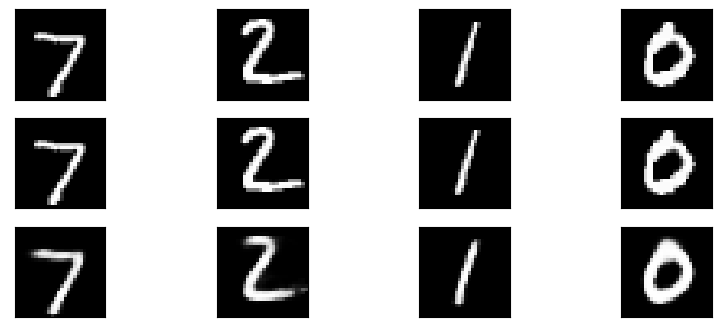

313/313 [==============================] - 0s 851us/step
The Original Image (row 1) vs Seasoned images (row 2) vs denoised images (row 3) for noise = 0.3


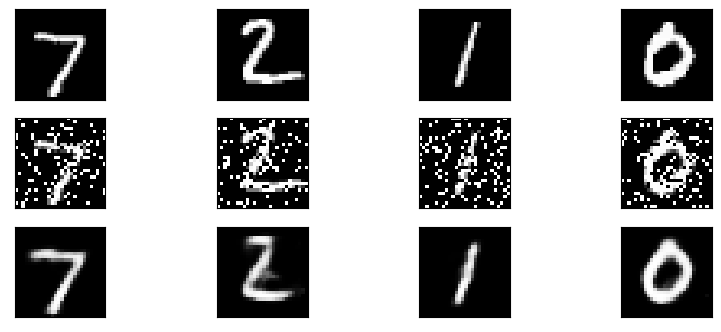

313/313 [==============================] - 0s 790us/step
The Original Image (row 1) vs Seasoned images (row 2) vs denoised images (row 3) for noise = 0.5


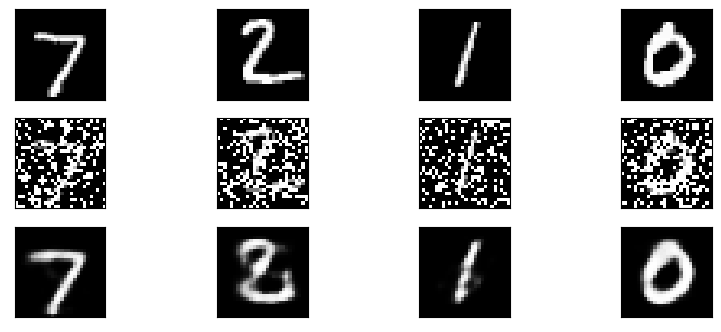

313/313 [==============================] - 0s 877us/step
The Original Image (row 1) vs Seasoned images (row 2) vs denoised images (row 3) for noise = 0.7


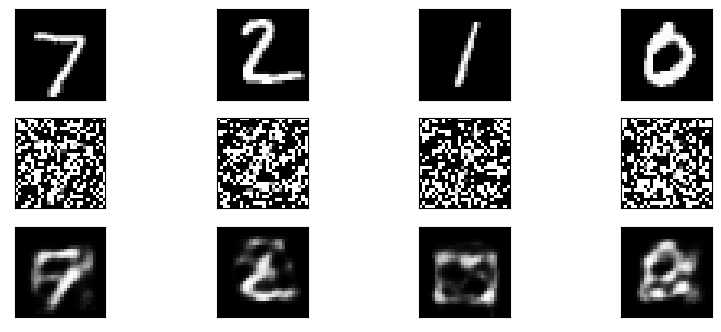

In [ ]:
# defining different levels of noise
noise = [0,0.3,0.5,0.7]

# run code below for each level of noise
for i in noise: 
    flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level=i)

    encoded = encoder_only.predict(flattened_x_test_seasoned) 
    decoded = decoder.predict(encoded)

    plt.figure(figsize=(10, 4))
    plt.gray()
    
    print("The Original Image (row 1) vs Seasoned images (row 2) vs denoised images (row 3) for noise =", i)
    for n in range(4):

        #The original image
        ax = plt.subplot(3, 4,n+1)
        plt.imshow(flattened_x_test[n].reshape(28, 28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        #The seasoned image
        ax = plt.subplot(3, 4,n+5)
        plt.imshow(flattened_x_test_seasoned[n].reshape(28, 28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # The decoded/reconstructed image
        ax = plt.subplot(3, 4,n+9)
        plt.imshow(decoded[n].reshape(28, 28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)     
    plt.show()

#### 4b answer
At what noise level does it become difficult to identify the digits for you?
- at a noicelevel between 0.3-0.5 it becomes very difficult to identify the digits for us. It's easier now when knowing what to expect as we print the originals above.

At what noise level does the denoising stop working?
- Looking at the print when noice = 0.7, the reconstruction is not really working for the digit 2 or 1. It does a pretty good job for digit 7 and 0 but the other two are unreadable and does not look close to a digit.

#### Question 4c 
Test whether denoising improves the classification with the best performing model you obtained  in  questions 2 or 3. Plot the true-positive rate as a function of noise-level for the seasoned and  denoised datasets – assume that the correct classification is the most likely class-label. Discuss your results.

In [ ]:
# fetching the previous best performing model
best_model = keras.models.load_model("convolutional_model")
noise = np.linspace(0,1,21)
seasoned_scores = []
denoised_scores = []

for i in noise:

    #Noisy images 
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=i)

    #Denoised images
    flattened_denoised = autoencoder.predict(flattened_x_test_seasoneed)

    #Reshaping the noicy and decoded images and to fit our model (wants a 28x28 matrix)
    #we do not want them flattened
    denoised = flattened_denoised.reshape(-1, 28, 28, 1)
    x_test_seasoneed = flattened_x_test_seasoneed.reshape(-1, 28, 28, 1)

    denoised_scores.append(best_model.evaluate(denoised, y_test, verbose=0)[1])
    seasoned_scores.append(best_model.evaluate(x_test_seasoneed, y_test, verbose=0)[1])

313/313 [==============================] - 0s 994us/step


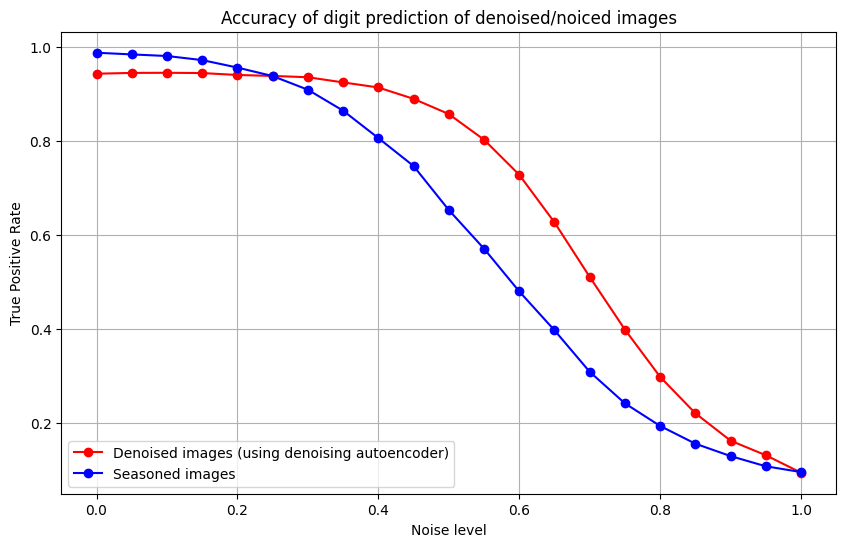

In [ ]:
# Plotting accuracy for different noise levels
plt.figure(figsize=(10,6))

plt.plot(noise, denoised_scores, c = 'r', label = 'Denoised images (using denoising autoencoder)', marker = 'o')
plt.plot(noise, seasoned_scores, c = 'b', label = 'Seasoned images', marker = 'o')
plt.title('Accuracy of digit prediction of denoised/noiced images')
plt.xlabel('Noise level')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#### Answer 4c: discussing the results
From the plot above we can see that we have a higher True Positive rate for the noicy test images until we reach a noice level of 0.25, trying to interpret this is that our denoising autoencoder actually makes the test images worse when we have a noice level < 0.25 in the process of encoding and decoding in relation to the original test images (the noicy test images are more similar to the original test images compared to our denoised test images). However, as we move beyond a noise level of 0.25 until a noise level of 1.0, our model does better on the denoised images, making those more similar to our original test images and we benefit from applying our denoising autoencoder. More specifically, we can identify a steep decline in the true positive rate after going beyond a noice level of 0.25 for the noisy images while it does not become as steep (approximately) until we reach a noice level of 0.6 for the denoised images. Meaning that we recieve the biggest benefit when using the denoising autoencoder when we have a noice level between 0.25-0.6, this benefit then starts decreasing and when the noice level is around 0.85-1.0, there is almost no benefit in tryng to denoise the noicy images. So regarding if we should use this denoising autoencoder model, that totally depends on how noicy we believe that our testing images are. If we have a very noice test, we would benefit from using it. 

 

#### Question 4d
Explain  how  you  can  use  the  decoder  part  of  the  denoising  auto-encoder  to  generate synthetic “hand-written” digits? – Describe the procedure and show examples in your report.

#### Answer 4d

The decoder part of autoencoder can be used to generate "hand written digits" via interpolation of the latent space. Hand written here does not actually means that a human has written them, but rather that they appear to be to be written by hand due to not being perfect and being based on the input pictures provided. 

Latent space here basically means a representation of compressed data. The different inputs (hand written numbers from 0-9) start of a vectors with full number of dimensions, these are during the encoding phase reduced to smaller versions with less dimensions. When ending up in a compressed format these reduced versions can be viewed as vectors spanning up at space - the latent space that is unique for the model at hand and the input it has been trained with (See picture of visualization of the latent space further down below). For simplicity, imagine vectors in a three dimensional space where the difference between the digits can be described as the distance between these vectors. A certain type of digit in this space can be said to lay closer to digits of its own type, but also closer to digits with similar features, and hence creating sorts of "clusters" in the latent space. 

Now, by interpolating from one of these vectors to another a number of "new" pictures not contained in the input set can be created and this is called the interpolation of the latent space. I.e. it is possible to interpolate data in the latent space, and use the model’s decoder to generate data samples (new digits). Although not being entirely new since they are not independent of the input, these merged versions are versions in between the input samples. This can be examplified by going from a vector representing a number 5 to a vector representing a number 9, and getting different merged versions of a 5 and a 9 in between. For values close to either of the two number, it can be argued that we have new versions of a 5 or a 9. For even better new versions of one number two vectors representing the same numbers can be used instead. (See picture of an interpolation between a 5 and a 9 down below). The same idea but more conceptually represented can alse be viewd in the "conceptial picture of an interpolation" down below.  

Also, through adding noise to the input digits and processing them with the autoencoder we create new handwritten digits in the sense that they are not exactly the same afterwards as before the procedure. Examples of this can be found in 4b. But this techincally used the encoding step, which might not be what was sought for in this question. 

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

#### Examples of interpolation 

 A visualization of the latent space for all different compressed inputs/numbers
<img src='/work/Latent space tree.png' width="800" height="400">

Conceptual picture of the interpolation 
<img src='/work/Latent space visualization.png' width="800" height="400">

 - Example of an interpolation between a 5 and a 9 
 <img src='/work/5-9.png' width="800" height="400">

 (picture taken from: https://hackernoon.com/latent-space-visualization-deep-learning-bits-2-bd09a46920df)

Sources: https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d

https://hackernoon.com/latent-space-visualization-deep-learning-bits-2-bd09a46920df 

https://machinelearningmastery.com/impressive-applications-of-generative-adversarial-networks/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85ae1618-9b9c-4671-808b-a0cb8ea95e84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>